<a href="https://colab.research.google.com/github/mynameis-sohee/Machine-Learning-Study/blob/main/%5BData_Handling%5D_Pandas_%EA%B8%B0%EB%B3%B8_%EC%82%AC%EC%9A%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[데이터 핸들링] Pandas 기본 사용법**

**Pandas 를 활용한 데이터 핸들링 방법 중, 기초이자 자주 사용하는 것을 정리했습니다.**

* Column 핸들링(추가, 삭제, 이름변경 등)
* Index 핸들링(추가, 삭제, 이름변경 등)
* 형변환, 대체
* 데이터 타입 핸들링(타입 확인, 변경, 타입조건 출력 등)
* Data Frame Feature 핸들링(삭제, 연산, 조건 출력,카테고리화 등)





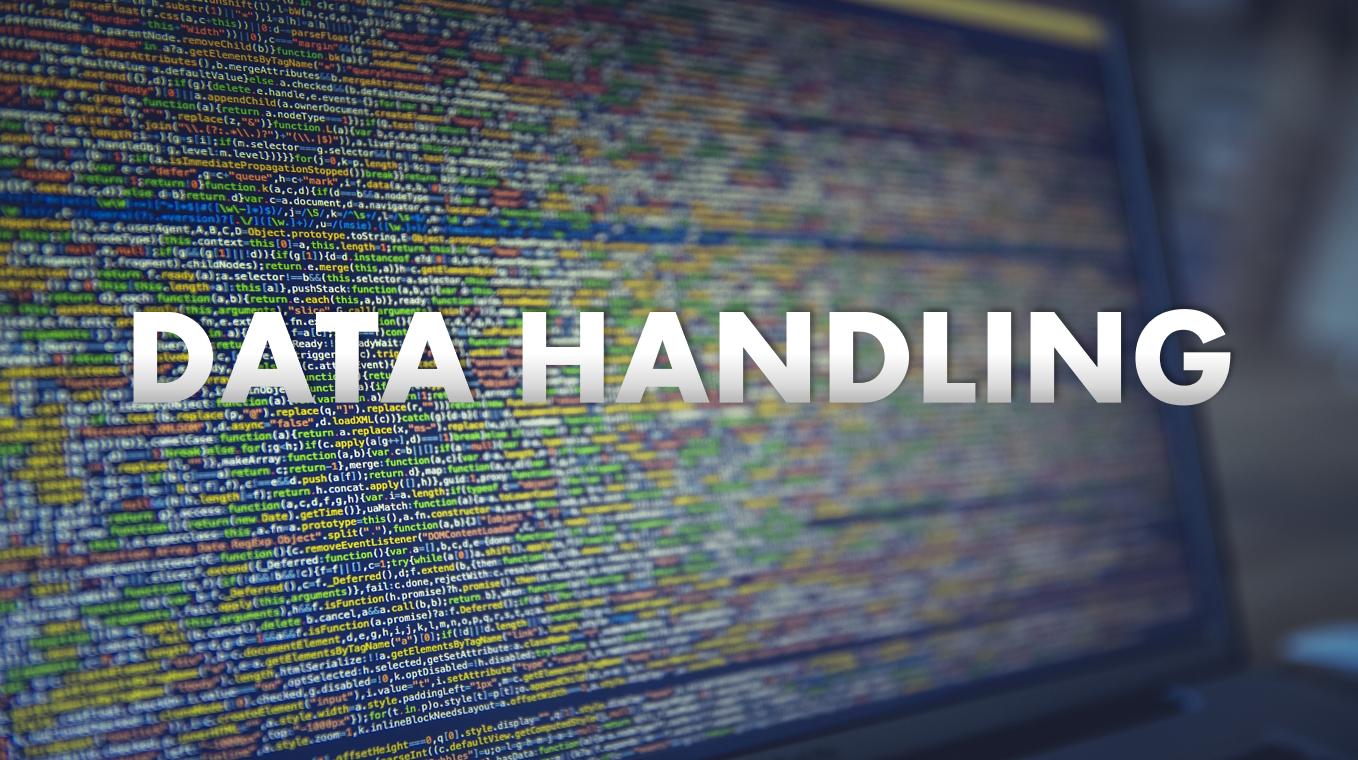

-----------------------------

In [ ]:
import pandas as pd

data = {'age':[11,12,23],'Name':['sola','mimi','anna'],'Birth':['5.22','4.13','12.05'], 'Price':['1,000','2500','300']}
df=pd.DataFrame(data)

In [ ]:
#컬럼명 추가
pd.DataFrame(df, columns=['age','Name','Birth','Price','New'])

,age,Name,Birth,Price,New
0,11,sola,5.22,"1,000",NaN
1,12,mimi,4.13,2500,NaN
2,23,anna,12.05,300,NaN


In [ ]:
#인덱스 새롭게 할당
pd.DataFrame(df, index=['5'])

,age,Name,Birth,Price
5,NaN,NaN,NaN,NaN


In [ ]:
#컬럼명 새롭게 할당
df.rename(columns ={'age':'Age'},inplace=True)
df

,Age,Name,Birth,Price
0,11,sola,5.22,"1,000"
1,12,mimi,4.13,2500
2,23,anna,12.05,300


In [ ]:
#데이터프레임의 크기 (행,열)
df.shape

(3, 4)

In [ ]:
#'Age' 기준으로 차순 정렬(차순 바꾸고자 할 때: ascending=False)
df.sort_values(by='Age', ascending=True)

,Age,Name,Birth,Price
0,11,sola,5.22,"1,000"
1,12,mimi,4.13,2500
2,23,anna,12.05,300


In [ ]:
df.iloc[:,3]

0    1,000
1     2500
2      300
Name: Price, dtype: object

In [ ]:
# 숫자데이터 콤마(comma) 제거 후 숫자형으로 변환
df.iloc[:,3]=pd.to_numeric(df.iloc[:,3].str.replace(',',''))
df

,Age,Name,Birth,Price
0,11,sola,5.22,1000
1,12,mimi,4.13,2500
2,23,anna,12.05,300


In [ ]:
# 생일데이터 월,일 split 후 월  Feature 생성
df['Birth-Month'] = df['Birth'].str.split('.').str[0]
df

,Age,Name,Birth,Price,Birth-Month
0,11,sola,5.22,1000,5
1,12,mimi,4.13,2500,4
2,23,anna,12.05,300,12


In [ ]:
# index 수 키우는 방법
df.index=df.index+5
df

,Age,Name,Birth,Price,Birth-Month
6,11,sola,5.22,1000,5
7,12,mimi,4.13,2500,4
8,23,anna,12.05,300,12


In [ ]:
# Feature 값 전체를 대문자로 변경 (소문자화: lower)
df['Name'].str.upper()

6    SOLA
7    MIMI
8    ANNA
Name: Name, dtype: object

In [ ]:
#데이터 분포 확인
print("'Name'의 Category수: ",df['Name'].nunique())
print("\n'Name'의 Category 종류: ",df['Name'].unique())
print("\n'Name'의 Category 종류/분포:\n",df['Name'].value_counts())

'Name'의 Category수:  3

'Name'의 Category 종류:  ['sola' 'mimi' 'anna']

'Name'의 Category 종류/분포:
 anna    1
sola    1
mimi    1
Name: Name, dtype: int64


In [ ]:
# 데이터 전치
df.T

,6,7,8
Age,11,12,23
Name,sola,mimi,anna
Birth,5.22,4.13,12.05
Price,1000,2500,300
Birth-Month,5,4,12


In [ ]:
#데이터프레임 붙이기 (1) Concat
df1=df
pd.concat([df1,df])

,Age,Name,Birth,Price,Birth-Month
6,11,sola,5.22,1000,5
7,12,mimi,4.13,2500,4
8,23,anna,12.05,300,12
6,11,sola,5.22,1000,5
7,12,mimi,4.13,2500,4
8,23,anna,12.05,300,12


In [ ]:
#데이터프레임 붙이기 (2) Merge
df.reset_index(drop=True,inplace=True)
df1 = pd.DataFrame({'City':['seoul','busan','cheongju']})
pd.merge(df1,df, right_index=True, left_index=True)

,City,Age,Name,Birth,Price,Birth-Month
0,seoul,11,sola,5.22,1000,5
1,busan,12,mimi,4.13,2500,4
2,cheongju,23,anna,12.05,300,12


데이터 Type

In [ ]:
#데이터 타입 확인
df.dtypes

Age             int64
Name           object
Birth          object
Price           int64
Birth-Month    object
dtype: object

In [ ]:
#특정 데이터타입 값 추출 (반대:  exclude)
df.select_dtypes(include='object').columns

Index(['Name', 'Birth', 'Birth-Month'], dtype='object')

In [ ]:
#데이터 타입 변경
df['Age'].astype('object')

0    11
1    12
2    23
Name: Age, dtype: object

In [ ]:
# 데이터 타입 Datetime으로 변경
pd.to_datetime('2020.03.12')

Timestamp('2020-03-12 00:00:00')

### 캐글 Titanic 데이터를 활용한 데이터 전처리 방법

In [ ]:
#데이터 로드
titanic_df = pd.read_csv('titanic_train.csv')

In [ ]:
#데이터 정보확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_cat        891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [ ]:
#null값 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_cat          0
dtype: int64

데이터 기본 연산

In [ ]:
#데이터프레임 값을 활용한 연산
titanic_df['Agee']=titanic_df['Age']+1
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agee
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,39.0


In [ ]:
# lambda 식 활용한 데이터프레임 연산 (위와 같은 접근이나 lambda 활용했다는 차이가 있음)
print(titanic_df['Age'].head(2),'\n')

titanic_df['Age']=titanic_df['Age'].apply(lambda x : x +1 )
print(titanic_df['Age'].head(2))

0    22.0
1    38.0
Name: Age, dtype: float64 

0    23.0
1    39.0
Name: Age, dtype: float64


Feature & Index 핸들링

In [ ]:
#Feature 삭제
titanic_df.drop('Agee',axis=1,inplace=True)
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,23.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,39.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
# Feature : ix 활용해 조건 DF 출력
print(titanic_df.ix[titanic_df['Age']>=80,'Name'])

630    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


In [ ]:
# Feature : iloc 활용해 index 조건에 맞는 DF 출력
titanic_df.iloc[1,:]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           39
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                          C
Embarked                                                       C
Age_cat                                                    Adult
Name: 1, dtype: object

In [ ]:
# Feature : loc 활용해 Feature 조건에 맞는 DF 출력
titanic_df.loc[5,'Sex']

'male'

In [ ]:
#조건에 맞는 Features 출력
titanic_df[titanic_df['Age'] > 60][['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",67.0
54,"Ostby, Mr. Engelhart Cornelius",66.0
96,"Goldschmidt, Mr. George B",72.0


In [ ]:
#2개 이상 조건에 맞는 Features 출력 ( and 연산자: & )
titanic_df[(titanic_df['Age'] > 50) | (titanic_df['Age'] <10)][['Name','Age']].head(3)

,Name,Age
6,"McCarthy, Mr. Timothy J",55.0
7,"Palsson, Master. Gosta Leonard",3.0
10,"Sandstrom, Miss. Marguerite Rut",5.0


In [ ]:
#Index 삭제
titanic_df.drop([0,1,2],axis=0).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,36.0,0,0,373450,8.05,NaN,S


In [ ]:
#Index 0부터 리셋하여 새로 정렬
titanic_df.reset_index(drop=True).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,23.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,39.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
#Index를 특정 Feature값으로 변경
titanic_df.set_index(keys='Embarked').head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
S,1,0,3,"Braund, Mr. Owen Harris",male,23.0,1,0,A/5 21171,7.2500,NaN
C,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,39.0,1,0,PC 17599,71.2833,C85


In [ ]:
# lambda 식 활용한 카테고리화
def get_category(age):
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age','Age_cat']].head(2)

,Age,Age_cat
0,23.0,Student
1,39.0,Adult


In [ ]:
#Feature값의 앞 구분자(알파벳)으로 카테고리화
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,23.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,39.0,1,0,PC 17599,71.2833,C,C,Adult


### 형태변환

In [ ]:
#ndarray -> DF 변환

import numpy as np

npy = [1,3,5]
col = ['col1']

print(np.shape(npy))
df = pd.DataFrame(npy, columns = col)
df

(3,)


,col1
0,1
1,3
2,5


In [ ]:
# dic -> DF 변환

dic1= {'A':[1,2,30],'B':[3,5,1]}
df=pd.DataFrame(dic1)
df

,A,B
0,1,3
1,2,5
2,30,1


In [ ]:
# DF -> ndarray 변환
df_nd= df.values
df_nd

array([[ 1,  3],
       [ 2,  5],
       [30,  1]], dtype=int64)

In [ ]:
# DF -> list 변환
df_list=df.values.tolist()
df_list

[[1, 3], [2, 5], [30, 1]]

In [ ]:
# DF -> dict 변환
df.to_dict('list')

{'A': [1, 2, 30], 'B': [3, 5, 1]}